In [1]:
import pyomo.environ as pyo
import pyomo.gdp as gdp
import numpy as np
import pandas as pd
import math 
import os, sys
from scipy.stats import multivariate_normal

from matplotlib import pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)
from enum import Enum

CURRENT_DIR = os.path.dirname(os.path.abspath("rare_pattern_detect"))
sys.path.append(os.path.dirname(CURRENT_DIR))

from rare_pattern_detect.patterns import PatternSpace, PatternSpaceType, MIN_AREA
from rare_pattern_detect.minlp_based import minlp_has_rare_pattern
from rare_pattern_detect.rare_pattern_detect import RarePatternDetect
from rare_pattern_detect.pattern_space_utils import draw_largest_bounding_area, draw2dpattern

# Notes: 
    - FIXME: Problem f_hat is zero eventhough point is inside the pattern 
    - ERROR: Unable to clone Pyomo component attribute. Component
        'interval_constraint_index' contains an uncopyable field '_init_dimen'
        (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
        field to `None` on new object
    - Using only two features we get different values for f_hat. However when using more (3 features) most of the f_hat values are equal to zero
# TODO:
    - Run the minlp solver on the cardio dataset and evaluate the performance using metrics
        - Calculate the false positive and false negative rate for the AUROC curve
        - Create AUROC curve using the variable (U_min, delta, epsilon, range for tau (should be relative to the value of f_hat)) -> single curve 
        - Repeat this for different U_min and plot all the auroc curves in one plot
    - Compare performance to SVM, RF using the metrics for supervised learning
    - Create a single 3D test (cube)


In [2]:
# MIN_AREA = 0.3 # 0.3

In [3]:
# # cmap = plt.get_cmap('viridis')

# # training_set =  np.array(
# #     [[0.0, 0.0], [2.0, 0.0], [0.0, 2.0], [2.0, 2.0]]
# # )
# training_set = multivariate_normal.rvs(size=(100,2))
# # point_to_be_classified = np.array([[0.25,0.25]])
# testing_set = multivariate_normal.rvs(size=(10,2))

# # os.listdir('../ADbench-main/datasets/Classical')
# # b = np.load('../ADbench-main/datasets/Classical/6_cardio.npz')
# # b.keys()
# # print(b.files)

with np.load('../ADBench-main/datasets/Classical/6_cardio.npz') as data:
    X = data['X']
    y = data['y']
    idx = np.random.permutation(len(X))
    X,y = X[idx], y[idx]

#  number of points is 1831
print("number of datapoints is: ",len(y))

# number of feature per data point is 21
print("number of feature per data point is: ", len(X[0]))


TRAINING_LIMIT = 200
TESTING_LIMIT = 10
FEATURES = 2

X = X[:TRAINING_LIMIT+TESTING_LIMIT,:FEATURES]
y = y[:TRAINING_LIMIT+TESTING_LIMIT]

training_set = X[:TRAINING_LIMIT]
training_labels = y[:TRAINING_LIMIT]

testing_set = X[TRAINING_LIMIT:-1]
testing_labels = y[TRAINING_LIMIT:-1]

number of datapoints is:  1831
number of feature per data point is:  21


min_area:  63.0
N=200 , d=2, vc=4
------- itr: 0 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



ERROR: Unable to clone Pyomo component attribute. Component
    'interval_constraint_index' contains an uncopyable field '_init_dimen'
    (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
    field to `None` on new object


         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      1.05


    functionality.  (deprecated in 6.4.2) (called from
    /Users/p392827/Desktop/PDG/porsche-research/pac-learning/pac-
    venv/lib/python3.9/site-
    packages/pyomo/contrib/mindtpy/initialization.py:154)


         1              MILP          0.101037            inf       0.101037      nan%      2.20
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP           0.10136            inf        0.10136      nan%      3.37
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP          0.138702            inf       0.138702      nan%      5.40
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP          0.178909            inf       0.178909      nan%      9.81
NLP subproblem was locally infeasible.
Solving feasibility problem
         5              MILP           1.55742            inf        1.55742      nan%     19.84
*        5         Fixed NLP           2.53677        2.53677        1.55742    38.61%     20.38
         6              MILP           1.62981        2.53677        1.62981    35.75%     27.25
*        6         Fixed NLP           2.00123       

evaluating: [-1.05325806  0.27465333] -> f_hat:2.0012328122301466 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.9987679472147237


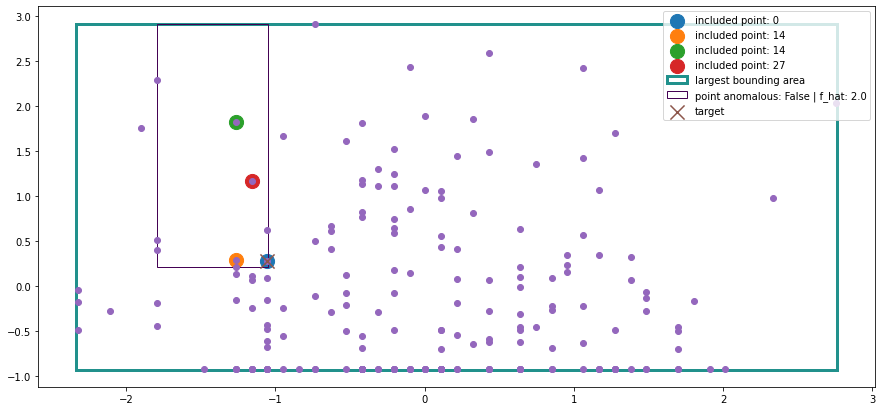

------- itr: 1 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.89
         1              MILP          0.101037            inf       0.101037      nan%      1.16
NLP subproblem was locally infeasible.
Solving feasibility problem
  

evaluating: [-0.41835583 -0.91998844] -> f_hat:9.019822871171367 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.2195361435707968


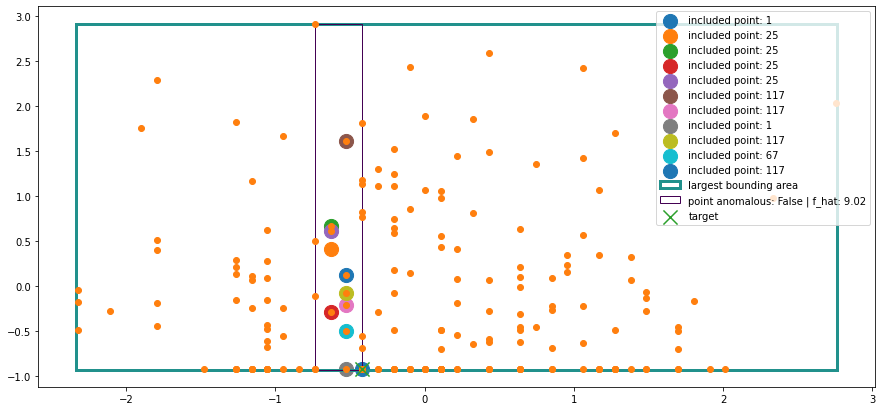

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html


------- itr: 2 -------
cutoff (min_area):  63.0


Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



ERROR: Unable to clone Pyomo component attribute. Component
    'interval_constraint_index' contains an uncopyable field '_init_dimen'
    (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
    field to `None` on new object


         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.82
         1              MILP         0.0999777            inf      0.0999777      nan%      1.46
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP          0.101689            inf       0.101689      nan%      2.55
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP          0.120078            inf       0.120078      nan%      4.17
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP          0.131482            inf       0.131482      nan%      5.95
NLP subproblem was locally infeasible.
Solving feasibility problem
         5              MILP          0.197774            inf       0.197774      nan%     10.25
*        5         Fixed NLP           1.25391        1.25391       0.197774    84.23%     10.72
         6              MILP          0.968068       

evaluating: [0.63981454 0.62975116] -> f_hat:1.2250691546542138 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.6325608986249571


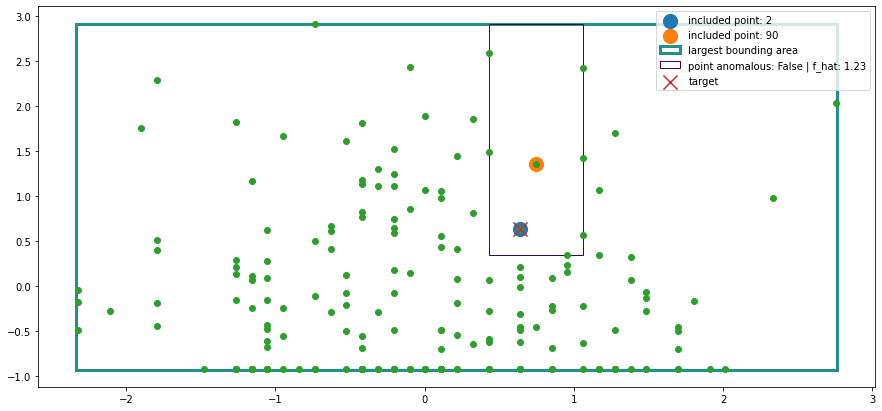

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html


------- itr: 3 -------
cutoff (min_area):  63.0


Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



ERROR: Unable to clone Pyomo component attribute. Component
    'interval_constraint_index' contains an uncopyable field '_init_dimen'
    (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
    field to `None` on new object


         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.77
         1              MILP          0.101037            inf       0.101037      nan%      1.08
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP          0.101276            inf       0.101276      nan%      2.34
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP          0.115966            inf       0.115966      nan%      3.68
*        3         Fixed NLP          0.501222       0.501222       0.115966    76.86%      4.42
         4              MILP          0.413485       0.501222       0.413485    17.50%      5.75
NLP subproblem was locally infeasible.
Solving feasibility problem
         5              MILP          0.501222       0.501222       0.501222     0.00%      8.27
MindtPy exiting on bound convergence. Absolute gap: 1.7045755917877159e-09 <= absolute tolerance: 0.0001 

 Primal integ

evaluating: [0.32236343 1.85266335] -> f_hat:0.5012219145595197 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.995124257244044


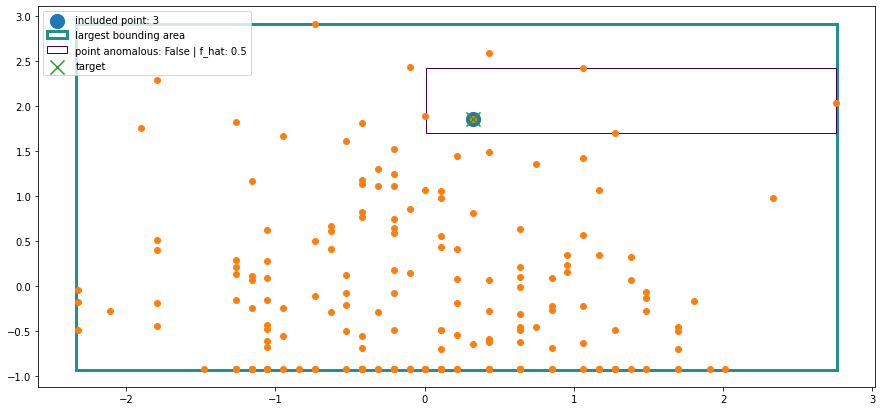

------- itr: 4 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.75
         1              MILP          0.101037            inf       0.101037      nan%      1.00
NLP subproblem was locally infeasible.
Solving feasibility problem
  

evaluating: [-0.41835583 -0.91998844] -> f_hat:9.019822871171367 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.2195361435707968


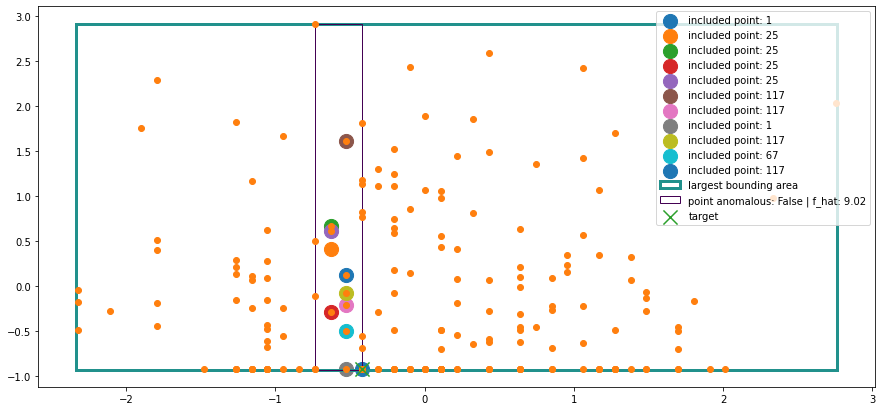

------- itr: 5 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.78
         1              MILP         0.0999777            inf      0.0999777      nan%      1.11
NLP subproblem was locally infeasible.
Solving feasibility problem
  

evaluating: [ 0.63981454 -0.48810827] -> f_hat:3.963359661498002 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.0092447674779403


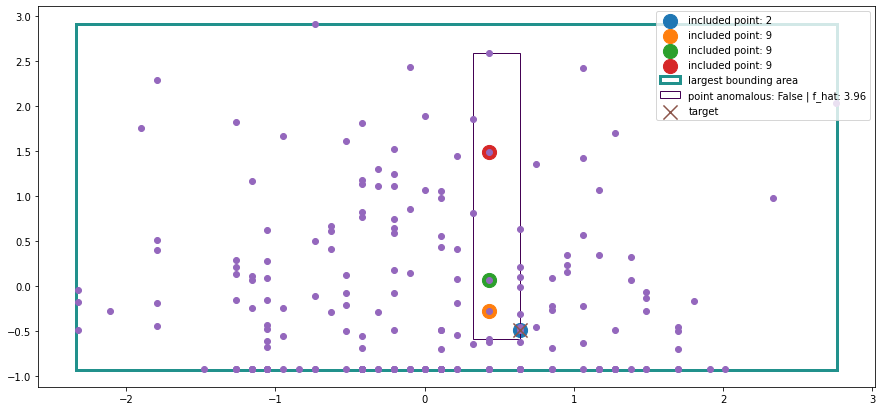

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html


------- itr: 6 -------
cutoff (min_area):  63.0


Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



ERROR: Unable to clone Pyomo component attribute. Component
    'interval_constraint_index' contains an uncopyable field '_init_dimen'
    (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
    field to `None` on new object


         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.87
         1              MILP          0.101037            inf       0.101037      nan%      1.20
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP           0.10195            inf        0.10195      nan%      2.66
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP           4.74005            inf        4.74005      nan%      5.63
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP           15.6983            inf        15.6983      nan%     16.14
NLP subproblem was locally infeasible.
Solving feasibility problem
         5              MILP           19.6796            inf        19.6796      nan%     23.57
*        5         Fixed NLP           8.19984        8.19984        19.6796   -140.00%     24.11
MindtPy exiting on bound convergence. Absolute gap: 

evaluating: [ 0.21654639 -0.91998844] -> f_hat:8.199838981064858 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.2195361424891502


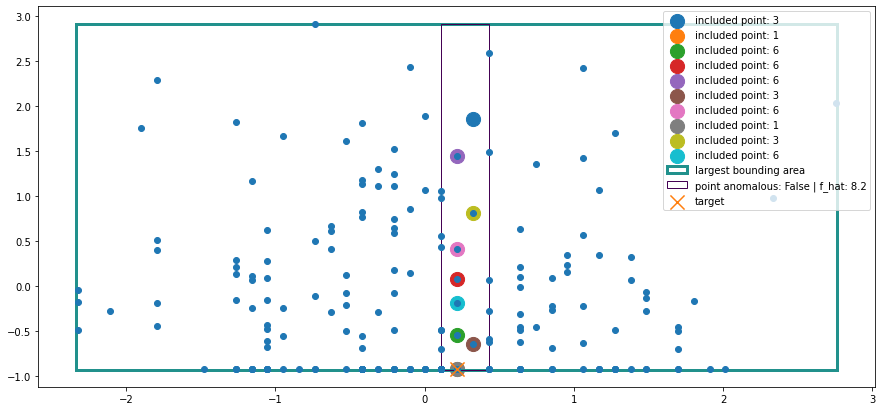

------- itr: 7 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



ERROR: Unable to clone Pyomo component attribute. Component
    'interval_constraint_index' contains an uncopyable field '_init_dimen'
    (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
    field to `None` on new object


         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.93
         1              MILP          0.101037            inf       0.101037      nan%      1.18
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP           0.10195            inf        0.10195      nan%      2.63
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP          0.644665            inf       0.644665      nan%      4.77
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP           4.29093            inf        4.29093      nan%     16.21
*        4         Fixed NLP           14.3352        14.3352        4.29093    70.07%     16.66
         5              MILP           11.6073        14.3352        11.6073    19.03%    113.82
NLP subproblem was locally infeasible.
Solving feasibility problem
         6              MILP           12.7093       

evaluating: [ 1.27471676 -0.91998844] -> f_hat:13.097320300925444 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.374326929969647


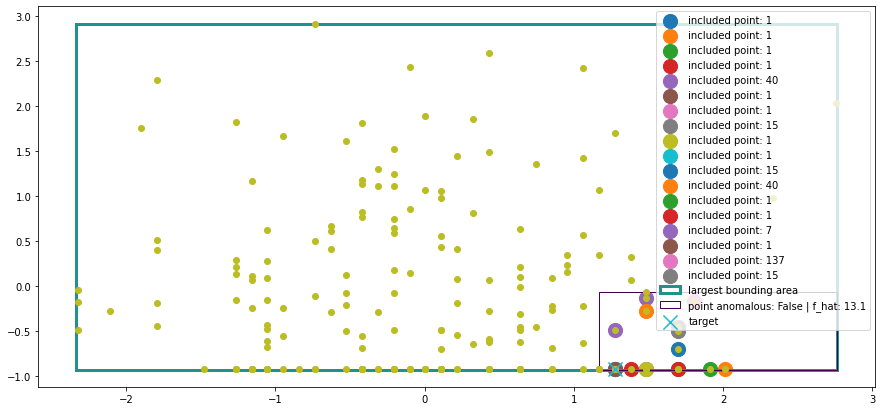

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.


------- itr: 8 -------
cutoff (min_area):  63.0


rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.86
         1              MILP          0.101037            inf       0.101037      nan%      1.31
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP          0.101478            inf       0.101478      nan%      2.74
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP          0.127335            inf       0.127335      nan%      4.31
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP          0.169114            inf       0.169114      nan%      7.62
*        4         Fixed NLP           1.68662        1.68662       0.169114    89.97%      8.13
         5              MILP           1.13896        1.68662        1.13896 

evaluating: [-0.41835583  1.1291675 ] -> f_hat:1.0967960410639546 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.8234930881587486


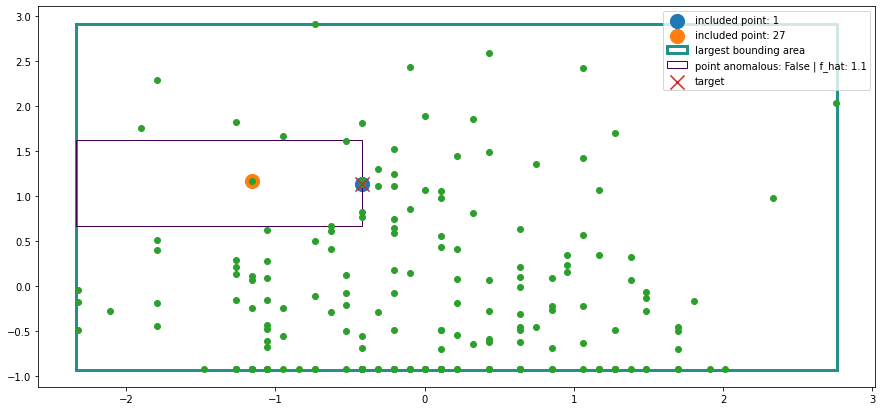

------- itr: 9 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



ERROR: Unable to clone Pyomo component attribute. Component
    'interval_constraint_index' contains an uncopyable field '_init_dimen'
    (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
    field to `None` on new object


         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      1.12
         1              MILP          0.101037            inf       0.101037      nan%      1.43
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP           0.10195            inf        0.10195      nan%      2.95
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP            2.2801            inf         2.2801      nan%      7.59
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP           14.9682            inf        14.9682      nan%     11.21
*        4         Fixed NLP            7.1673         7.1673        14.9682   -108.84%     11.81
MindtPy exiting on bound convergence. Absolute gap: -7.800892650322433 <= absolute tolerance: 0.0001 

 Primal integral          :    0.0000 
 Dual integral            :   102.8257 
 Primal-dual gap integral :   102.

evaluating: [ 0.42818046 -0.91998844] -> f_hat:7.167297989034076 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.1161807437391265


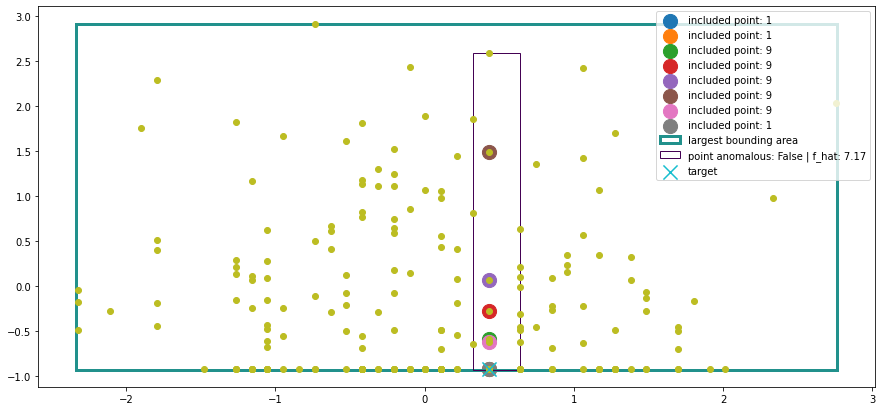

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html


------- itr: 10 -------
cutoff (min_area):  63.0


Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.79
         1              MILP          0.101037            inf       0.101037      nan%      1.14
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP          0.101361            inf       0.101361      nan%      2.65
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP          0.143736            inf       0.143736      nan%      4.84
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP           8.49826            inf   

evaluating: [ 0.21654639 -0.5442591 ] -> f_hat:6.488426252842514 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.078844041254745


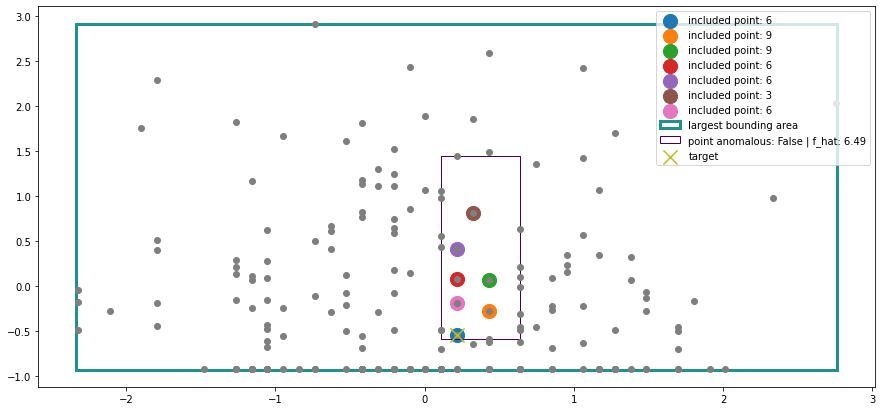

------- itr: 11 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      1.06
         1              MILP          0.100983            inf       0.100983      nan%      1.74
NLP subproblem was locally infeasible.
Solving feasibility problem
  

evaluating: [1.27471676 1.69457714] -> f_hat:0.31891366593134507 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  3.1356448682737774


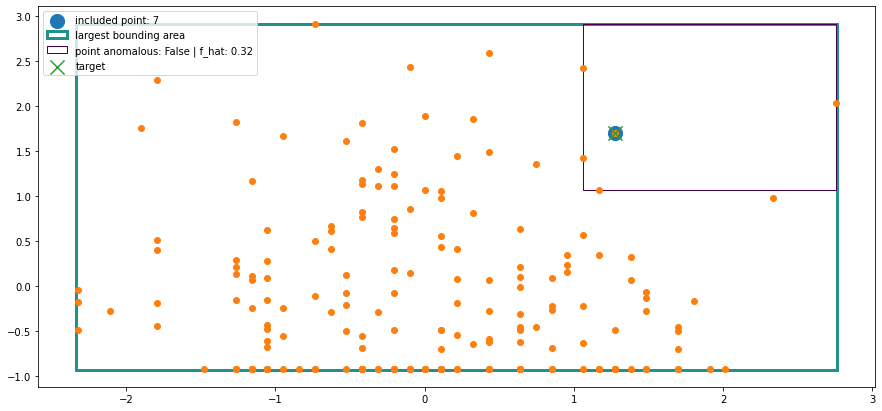

------- itr: 12 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.91
         1              MILP          0.097859            inf       0.097859      nan%      1.23
*        1         Fixed NLP          0.614988       0.614988       0

evaluating: [ 2.01543602 -0.91998844] -> f_hat:0.6149879413355032 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.6260481430390443


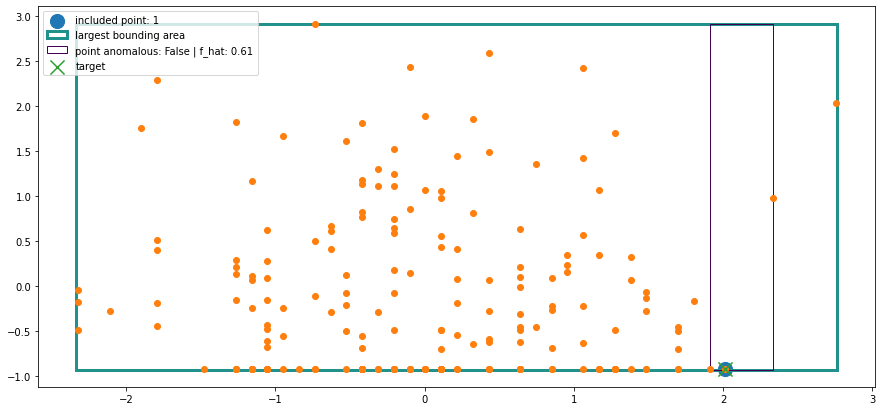

------- itr: 13 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



ERROR: Unable to clone Pyomo component attribute. Component
    'interval_constraint_index' contains an uncopyable field '_init_dimen'
    (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
    field to `None` on new object


         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      1.03
         1              MILP          0.101037            inf       0.101037      nan%      1.80
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP          0.101159            inf       0.101159      nan%      3.35
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP           0.12509            inf        0.12509      nan%      4.85
*        3         Fixed NLP          0.696009       0.696009        0.12509    82.03%      5.50
         4              MILP           0.42854       0.696009        0.42854    38.43%      6.07
NLP subproblem was locally infeasible.
Solving feasibility problem
         5              MILP          0.666748       0.696009       0.666748     4.20%      7.83
         5         Fixed NLP           1.02882       0.696009       0.666748     4.20%      8.20
         6             

evaluating: [-0.41835583  1.80632794] -> f_hat:0.6960089080340014 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.4367632202074463


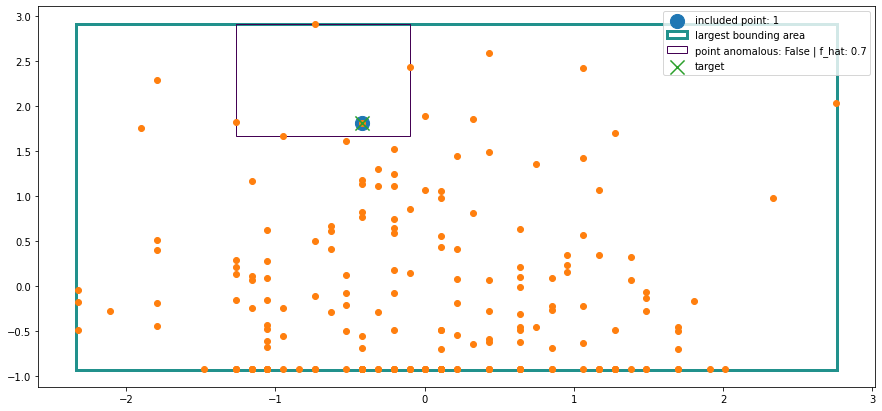

------- itr: 14 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.87
MILP solver reported feasible solution, but not guaranteed to be optimal.
         1              MILP         0.0969459            inf      0.0510484      nan%      

evaluating: [-1.26489213  0.13449798] -> f_hat:0.49340335254854384 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  2.026739370202424


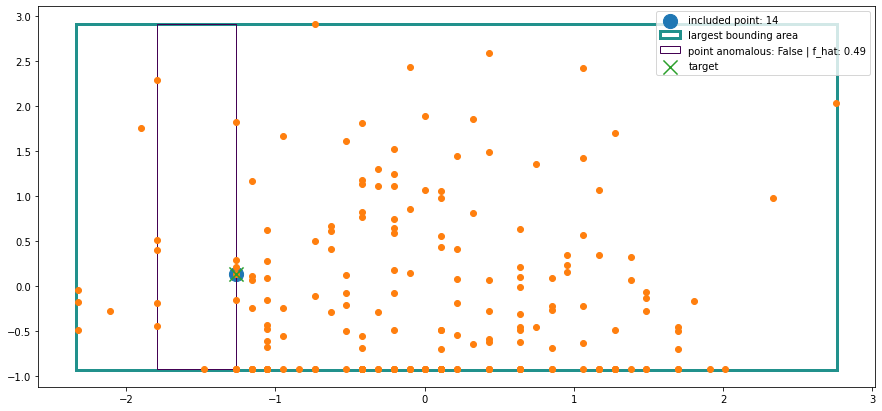

------- itr: 15 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



ERROR: Unable to clone Pyomo component attribute. Component
    'interval_constraint_index' contains an uncopyable field '_init_dimen'
    (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
    field to `None` on new object


         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.82
         1              MILP         0.0999777            inf      0.0999777      nan%      1.08
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP           0.10195            inf        0.10195      nan%      2.44
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP          0.290507            inf       0.290507      nan%      4.03
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP           4.25915            inf        4.25915      nan%      6.96
*        4         Fixed NLP           3.29184        3.29184        4.25915   -29.38%      7.46
MindtPy exiting on bound convergence. Absolute gap: -0.9673053204462261 <= absolute tolerance: 0.0001 

 Primal integral          :    0.0000 
 Dual integral            :   16.4848 
 Primal-dual gap integral :   16.48

evaluating: [ 1.69798491 -0.91998844] -> f_hat:3.291841116531923 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  2.43025094978712


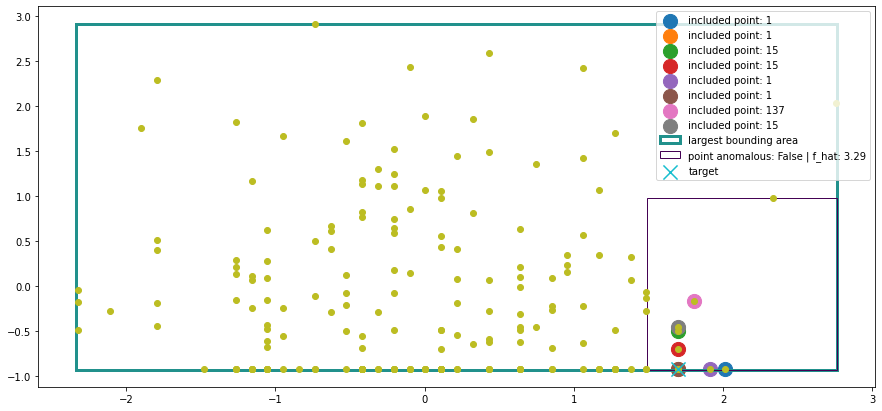

---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html


------- itr: 16 -------
cutoff (min_area):  63.0


Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)



ERROR: Unable to clone Pyomo component attribute. Component
    'interval_constraint_index' contains an uncopyable field '_init_dimen'
    (<class 'pyomo.core.base.initializer.ConstantInitializer'>).  Setting
    field to `None` on new object


         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.88
         1              MILP          0.101037            inf       0.101037      nan%      1.22
NLP subproblem was locally infeasible.
Solving feasibility problem
         2              MILP           0.10195            inf        0.10195      nan%      3.39
NLP subproblem was locally infeasible.
Solving feasibility problem
         3              MILP          0.441533            inf       0.441533      nan%      5.37
NLP subproblem was locally infeasible.
Solving feasibility problem
         4              MILP          0.638528            inf       0.638528      nan%      8.36
*        4         Fixed NLP           9.63718        9.63718       0.638528    93.37%      8.91
         5              MILP           7.01639        9.63718        7.01639    27.19%     10.13
*        5         Fixed NLP           8.03482        8.03482        7.01639    12.68%     10.66
         6             

evaluating: [ 1.3805338  -0.91998844] -> f_hat:8.03482029285925 <?> mu:0.1
Classification result:  False
area_calculated_pattern:  1.8668743610023089


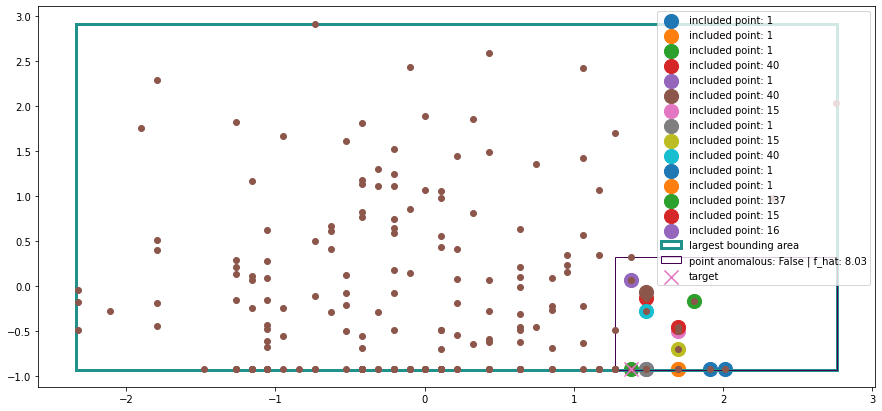

------- itr: 17 -------
cutoff (min_area):  63.0


---------------------------------------------------------------------------------------------
              Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo (MindtPy)               
---------------------------------------------------------------------------------------------
For more information, please visit https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html
Original model has 1812 constraints (1 nonlinear) and 0 disjunctions, with 1006 variables, of which 1000 are binary, 0 are integer, and 6 are continuous.
Objective is nonlinear. Moving it to constraint set.
rNLP is the initial strategy being used.

 Iteration | Subproblem Type | Objective Value | Primal Bound |   Dual Bound |   Gap   | Time(s)

         -       Relaxed NLP         0.0510484            inf      0.0510484      nan%      0.85
         1              MILP          0.101037            inf       0.101037      nan%      1.48
NLP subproblem was locally infeasible.
Solving feasibility problem
  

In [4]:
points_outside_of_largest_bounding_area = 0
indeces = []
predictions = []

mu, epsilon, delta = 0.1, 0.1, 0.1
N, d = training_set.shape
v = 2 * d 
min_area = 63.0 # MIN_AREA 
print("min_area: ", min_area)
print(f"N={N} , d={d}, vc={v}")

lba = np.zeros((d,2), dtype=float)
for i in np.arange(0,d,1):
    lba[i] = np.array(
        [
            np.min(training_set[:, i]) - 1e-2, 
            np.max(training_set[:, i]) + 1e-2
        ]
    )

for i, point_to_be_classified in enumerate(training_set): # testing_set
    print(f"------- itr: {i} -------")
    
    minlp_model, classification_result = minlp_has_rare_pattern(
        point_to_be_classified,
        training_set,
        PatternSpace(
            type = PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
            cutoff = min_area if min_area != None else 0.1
        ),
        mu,
        debugging_minlp_model=True,
    )
    
    print("Classification result: ",classification_result)
    predictions.append(classification_result)
    
    ax = plt.gca()
    if minlp_model is not None:
        result = (
            mu,
            classification_result,
            minlp_model
        )
        included_points = minlp_model.extract_points_included_in_pattern()
        calculated_pattern = minlp_model.extract_pattern()
        area_calculated_pattern = np.prod(np.apply_along_axis(lambda i: i[1] - i[0], axis=1, arr=calculated_pattern))
        print("area_calculated_pattern: ", area_calculated_pattern)
        # assert area_calculated_pattern is not None, "area of minimized pattern is None"
        # assert area_calculated_pattern >= 0, "area of minimized pattern is negative"
        largest_bounding_area = minlp_model.largest_bounding_area
        [plt.scatter(
            x=p[0], 
            y=p[1], 
            marker="o", 
            s=200, 
            label=f"included point: {np.argwhere(training_set == p)[0,0]}") for _, p in enumerate(included_points)
        ]
        plt.legend([f"area of calculated pattern: {area_calculated_pattern}"])
        draw_largest_bounding_area(largest_bounding_area, ax)
        draw2dpattern(calculated_pattern, ax, classification_result, minlp_model.minimized_f_hats, len(training_set))
        plt.legend(bbox_to_anchor=(1.1, 1.1))
    else:
        print(f"---> !! minlp model is none and classification results: {classification_result} !! ")
        draw_largest_bounding_area(lba, ax)
        ax.legend()
        points_outside_of_largest_bounding_area += 1 
        indeces.append(i)

    plt.scatter(x=training_set[:,0], y=training_set[:,1])
    plt.scatter(
        x=point_to_be_classified[0], 
        y=point_to_be_classified[1], 
        marker="x",  
        s=200, 
        label="target") 
    plt.legend()
    plt.show()

print("-- END __")
print("Points that lie outside of the largest bounding area defined by the training set: ",points_outside_of_largest_bounding_area) 
print("indices of the points: ", indeces)

# Testing RarePatternDetect class

In [1]:
# # print(training_set)

# rpd = RarePatternDetect(
#     delta=0.01,
#     tau=0.01,
#     epsilon=0.01,
#     pattern_space = PatternSpace(
#         PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
#         cutoff = 0.41 # 3 #min_area
#     )
# )
# rpd.load_training_data(training_set)
# preds = [rpd.is_anomalous(point_to_be_classified) for _, point_to_be_classified in enumerate(testing_set)]
# print(preds)

# print(predictions)
# # -> should get the same results
# assert preds == predictions
# # ssert preds in np.array([True, False]) and no "None"
# assert None not in preds 
# assert None not in predictions

# Experiment: Prediction using Isolation Forest and comparison with the minlp solver

In [2]:
# from sklearn.ensemble import IsolationForest

# clf = IsolationForest(random_state=0).fit(X)
# r = clf.predict(X) # -1 anomalie
# r = np.where(r==1, r, False).astype(bool)
# # print("r: ",r)

# count_similar_predictions = np.count_nonzero(r == preds)
# per_similar_predictions = count_similar_predictions/len(X)
# count_similar_predictions,  per_similar_predictions


# Testing the solver on more than two features

In [ ]:
# with np.load('../ADbench-main/datasets/Classical/6_cardio.npz') as data:
#     X = data['X']
#     y = data['y']

# TRAINING_LIMIT = 200
# TESTING_LIMIT = 10
# FEATURES = 2

# X = X[:,:FEATURES]

# training_set = X[:TRAINING_LIMIT]
# training_labels = y[:TRAINING_LIMIT]

# # slicing
# testing_set = X[TRAINING_LIMIT:-1:300]
# testing_labels = y[TRAINING_LIMIT:-1:300]

# rpd = RarePatternDetect(
#     delta=0.1,
#     tau=0.1,
#     epsilon=0.1,
#     pattern_space = PatternSpace(
#         PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
#         cutoff = 0.1
#     )
# )

# # print("testing_set: ", testing_set)
# rpd.fit(training_set)

# preds = [rpd.predict_score(point_to_be_classified) for _, point_to_be_classified in enumerate(testing_set)]

# print("--- RESULTS ---")
# print("predictions: ", preds)

# Evaluating the performance (AUROC) on 300 points with 3 features

In [ ]:
# # Loading the data
# with np.load('../ADBench-main/datasets/Classical/6_cardio.npz') as data:
#     X = data['X']
#     y = data['y']
#     idx = np.random.permutation(len(X))
#     X,y = X[idx], y[idx]

# TRAINING_LIMIT = 300
# FEATURES = 3
# X = X[:TRAINING_LIMIT,:FEATURES]
# y = y[:TRAINING_LIMIT]

In [ ]:
# # creating a range of taus
# taus = [0.1] # np.linspace(start=0.1,stop=1.0,num=5)

# # Creating a range of min areas
# # min_areas = np.linspace(start=0.1,stop=40.0,num=4)

# predictions_list = []
# print(f"num datapoints: {len(y)}")

# # for i, ma in enumerate(min_areas):
#     # print(f"––– ––– ––– new round: i={i}, min_area:{ma}  ––– ––– –––")
# for i, tau in enumerate(taus):
#     print(f"––– ––– ––– new round: i={i}, tau:{tau}  ––– ––– –––")
#     rpd = RarePatternDetect(
#         delta=0.1,
#         tau=tau,
#         epsilon=0.1,
#         pattern_space = PatternSpace(
#             PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
#             cutoff = 30.0914 # 63.0 for 100 points # 48.8 for 200
#         )
#     )

#     rpd.fit(X)
#     preds = []
#     for _, point_to_be_classified in enumerate(X):
#         preds.append(rpd.predict_score(point_to_be_classified))

#     print(f" --> RESULTS for tau: {tau} ---")
#     # print(f" --> RESULTS for min_area: {ma} ---")
#     # print("predictions: ", preds)
#     # print("labels: ", y)
#     # print("r: ",r)
#     predictions_list.append(preds)
#     preds = np.where(preds==1, preds, False).astype(bool)
#     count_similar_predictions = np.count_nonzero(y == preds)
#     per_similar_predictions = count_similar_predictions/len(y)
#     print(f" similar results: {count_similar_predictions},  percentage: {per_similar_predictions}")

In [ ]:
# from sklearn import metrics
# print(p)
# for _, p in enumerate(predictions_list):
#     auc = metrics.roc_auc_score(y, p)

#     # Recall that a model with an AUC score of 0.5 is no better than a model that performs random guessing.
#     print("auroc: ",auc)

#     fpr, tpr, _ = metrics.roc_curve(y, p)
    
#     #create ROC curve
#     plt.plot(fpr,tpr)
#     print(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# Evaluating the performance on 100 points with two features and scaling tau 

In [ ]:
# # Loading the data
# with np.load('../ADBench-main/datasets/Classical/6_cardio.npz') as data:
#     X = data['X']
#     y = data['y']
#     idx = np.random.permutation(len(X))
#     X,y = X[idx], y[idx]

# TRAINING_LIMIT = 100
# FEATURES = 2
# X = X[:TRAINING_LIMIT,:FEATURES]
# y = y[:TRAINING_LIMIT]

# # creating a range of taus
# taus = np.linspace(start=0.1,stop=1.0,num=5)

# # Creating a range of min areas
# # min_areas = np.linspace(start=0.1,stop=40.0,num=4)

# predictions_list = []
# print(f"num datapoints: {len(y)}")

# # for i, ma in enumerate(min_areas):
#     # print(f"––– ––– ––– new round: i={i}, min_area:{ma}  ––– ––– –––")
# for i, tau in enumerate(taus):
#     print(f"––– ––– ––– new round: i={i}, tau:{tau}  ––– ––– –––")
#     rpd = RarePatternDetect(
#         delta=0.1,
#         tau=tau,
#         epsilon=0.1,
#         pattern_space = PatternSpace(
#             PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
#             cutoff = 30.0914 # 63.0 for 100 points # 48.8 for 200
#         )
#     )

#     rpd.fit(X)
#     preds = []
#     for _, point_to_be_classified in enumerate(X):
#         preds.append(rpd.predict_score(point_to_be_classified))

#     print(f" --> RESULTS for tau: {tau} ---")
#     predictions_list.append(preds)
#     preds = np.where(preds==1, preds, False).astype(bool)
#     count_similar_predictions = np.count_nonzero(y == preds)
#     per_similar_predictions = count_similar_predictions/len(y)
#     print(f" similar results: {count_similar_predictions},  percentage: {per_similar_predictions}")

In [ ]:
# for i, (p,tau) in enumerate(zip(predictions_list,taus)):
#     # TODO: make sure this is correct 
#     auc = metrics.roc_auc_score(y, p)

#     # Recall that a model with an AUC score of 0.5 is no better than a model that performs random guessing.
#     print("auroc: ",auc)

#     fpr, tpr, _ = metrics.roc_curve(y, p)
    
#     #create ROC curve
#     plt.scatter(fpr,tpr, label=f"{tau}")
#     plt.legend(loc="upper left")
#     print(fpr,tpr)

# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()